2. For testing the convexity / non-convexity of the cost function, consider one example from the first dataset. Now plot the cost function by varying the values of parameters (\theta) for logistic regression cost. Note that the hypothesis to be used is the sigmoid function in both the cases.

In [2]:
import copy
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


In [3]:
def get_DATA(filename):
    data = pd.read_excel(filename)
    data.fillna(0, inplace=True)
    return data


In [4]:
def get_cost_function(h_theta_x, logistic=False):
    def cost_func(thetas, training_set):
        result = 0
        for training_sample in training_set:
            nonlocal logistic
            if logistic:
                hx = h_theta_x(thetas, training_sample[:-1])
                y = training_sample[-1]
                result += -y * math.log(hx) - (1 - y) * math.log(1 - hx)
            else:
                result += pow(h_theta_x(thetas, training_sample[:-1]) - training_sample[-1], 2)
        result *= (1 / (2 * len(training_set)))
        return result
    return cost_func

In [5]:
def hypothesis_linear_regression(thetas, training_sample):
    return thetas[0] + sum(training_sample * thetas[1:])

In [6]:
def hypothesis_logistic_regression(thetas, training_sample):
    z = thetas[0] + sum(training_sample * thetas[1:])
    return 1 / (1 + np.e ** (-z))

In [7]:
filename = r"C:\Users\SRAVAN NEELI\Desktop\DAIICT\DeepLearning\lab3\ex2data2-logistic.xls"
data_main = get_DATA(filename)
data = copy.deepcopy(data_main)
my_training_set = data.iloc[:, :2].values
my_cost_func_linear_regression = get_cost_function(hypothesis_linear_regression)
my_cost_func_logistic_regression_non_convex = get_cost_function(hypothesis_logistic_regression)
my_cost_func_logistic_regression_convex = get_cost_function(hypothesis_logistic_regression, logistic=True)

In [8]:
my_thetas_lst = []

In [9]:
cost_lst_linear_regression = []
cost_lst_logistic_regression_non_convex = []
cost_lst_logistic_regression_convex = []

In [10]:
start = -10
stop = 10
step = 1
for theta_0 in np.arange(start, stop, step):
    for theta_1 in np.arange(start, stop, step):
        my_thetas_lst.append(np.array([theta_0, theta_1]))


In [11]:
for my_thetas in my_thetas_lst:
    cost_linear = my_cost_func_linear_regression(my_thetas, my_training_set)
    cost_logistic_non_convex = my_cost_func_logistic_regression_non_convex(my_thetas, my_training_set)
    cost_logistic_convex = my_cost_func_logistic_regression_convex(my_thetas, my_training_set)
    cost_lst_linear_regression.append(cost_linear)
    cost_lst_logistic_regression_non_convex.append(cost_logistic_non_convex)
    cost_lst_logistic_regression_convex.append(cost_logistic_convex)

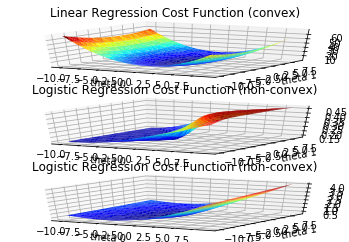

In [12]:
theta_0_lst = [x[0] for x in my_thetas_lst]
theta_1_lst = [x[-1] for x in my_thetas_lst]

plt.close('all')

fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(311, projection='3d')
ax.set_title('Linear Regression Cost Function (convex)')
ax.plot_trisurf(theta_0_lst, theta_1_lst, cost_lst_linear_regression, cmap=cm.jet, linewidth=0.1)
plt.xlabel('theta 0')
plt.ylabel('theta 1')

ax = fig.add_subplot(312, projection='3d')
ax.set_title('Logistic Regression Cost Function (non-convex)')
ax.plot_trisurf(theta_0_lst, theta_1_lst, cost_lst_logistic_regression_non_convex, cmap=cm.jet, linewidth=0.1)
plt.xlabel('theta 0')
plt.ylabel('theta 1')

ax = fig.add_subplot(313, projection='3d')
ax.set_title('Logistic Regression Cost Function (non-convex)')
ax.plot_trisurf(theta_0_lst, theta_1_lst, cost_lst_logistic_regression_convex, cmap=cm.jet, linewidth=0.1)
plt.xlabel('theta 0')
plt.ylabel('theta 1')

plt.show()